 # Import necessary libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
sns.set(style='whitegrid')

# Load the dataset

In [4]:
# Load the dataset
df = pd.read_csv('titanic_data.csv')

# Display first few rows to understand structure
df.head()

,PassengerId_0,Pclass_0,Name_0,Sex_0,Age_0,SibSp_0,Parch_0,Fare_0,Survived_0,PassengerId_1,...,Pclass_221,Name_221,Sex_221,Age_221,SibSp_221,Parch_221,Fare_221,Survived_221,PassengerId_222,Pclass_222
0,1,1,Passenger_1,female,50.9,0,5,360.31,0,1,...,1,Passenger_1,female,50.9,0,5,360.31,0,1,1
1,2,1,Passenger_2,male,46.6,0,2,22.08,0,2,...,1,Passenger_2,male,46.6,0,2,22.08,0,2,1
2,3,3,Passenger_3,male,16.9,1,5,176.53,0,3,...,3,Passenger_3,male,16.9,1,5,176.53,0,3,3
3,4,3,Passenger_4,female,49.6,1,3,385.23,1,4,...,3,Passenger_4,female,49.6,1,3,385.23,1,4,3
4,5,3,Passenger_5,female,12.2,1,0,441.06,1,5,...,3,Passenger_5,female,12.2,1,0,441.06,1,5,3


#  Data Cleaning and Restructuring

In [5]:
# Identify unique passenger IDs
passenger_cols = [col for col in df.columns if 'PassengerId_' in col]
num_passengers = len(passenger_cols)

# Create a list to store cleaned passenger data
passenger_data = []

# Extract each passenger's information
for i in range(num_passengers):
    # Get all columns for this passenger
    passenger_cols = [col for col in df.columns if f'_{i}' in col]
    
    # Create a temporary dataframe with just this passenger's data
    temp_df = df[passenger_cols].copy()
    
    # Remove the suffix from column names
    temp_df.columns = [col.replace(f'_{i}', '') for col in temp_df.columns]
    
    # Add to our list
    passenger_data.append(temp_df)

# Combine all passenger data into one dataframe
clean_df = pd.concat(passenger_data, ignore_index=True)

# Drop duplicate rows (since data was repeated)
clean_df = clean_df.drop_duplicates()

# Reset index
clean_df.reset_index(drop=True, inplace=True)

# Display cleaned dataframe
clean_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Survived,PassengerId0,...,Survived98,PassengerId99,Pclass99,Name99,Sex99,Age99,SibSp99,Parch99,Fare99,Survived99
0,1,1,Passenger_1,female,50.9,0.0,5.0,360.31,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,1,Passenger_2,male,46.6,0.0,2.0,22.08,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,3,Passenger_3,male,16.9,1.0,5.0,176.53,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,3,Passenger_4,female,49.6,1.0,3.0,385.23,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,3,Passenger_5,female,12.2,1.0,0.0,441.06,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Basic Data Exploration

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6000 entries, 0 to 5999
Columns: 999 entries, PassengerId to Survived99
dtypes: float64(775), int64(2), object(222)
memory usage: 45.7+ MB


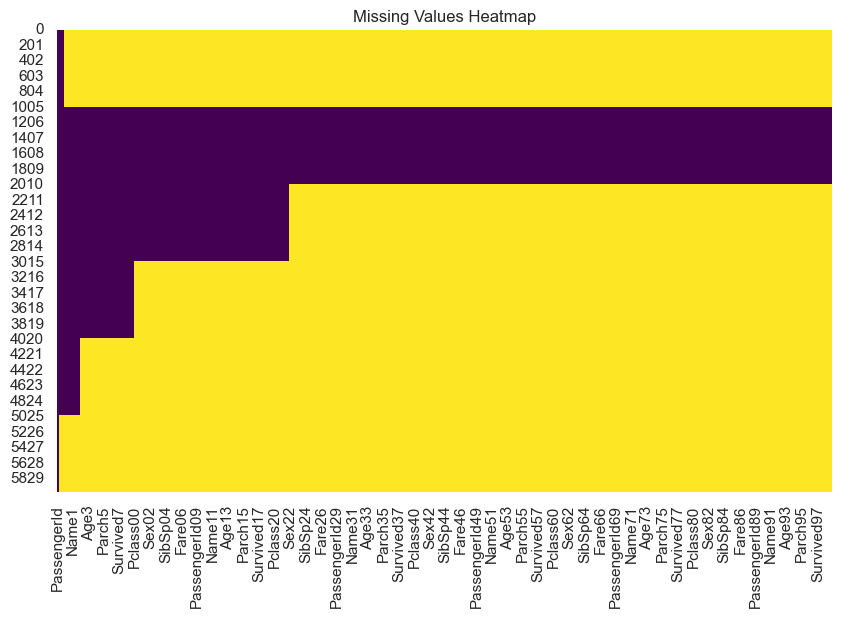

In [6]:
# Check basic info about the dataset
clean_df.info()

# Get statistical summary
clean_df.describe(include='all')

# Check for missing values
clean_df.isnull().sum()

# Visualize missing data
plt.figure(figsize=(10, 6))
sns.heatmap(clean_df.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Values Heatmap')
plt.show()

# Data Visualization

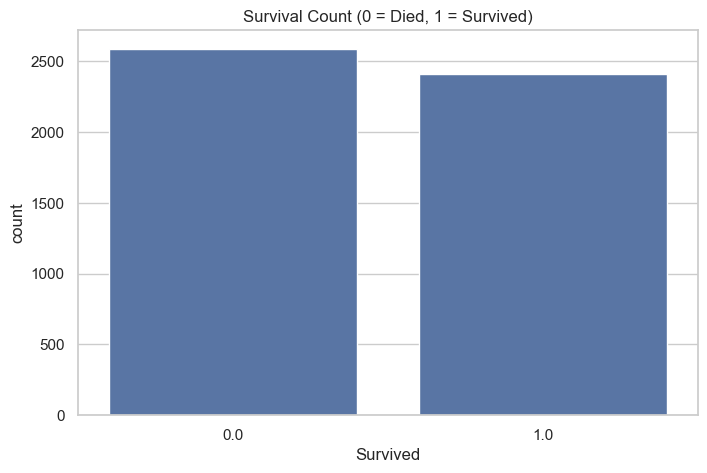

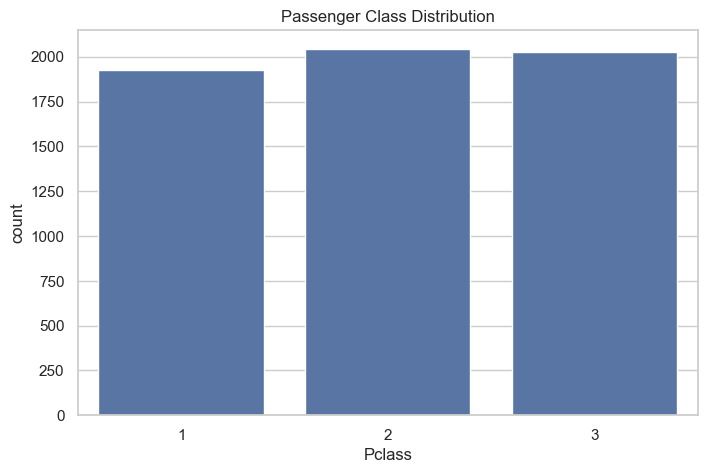

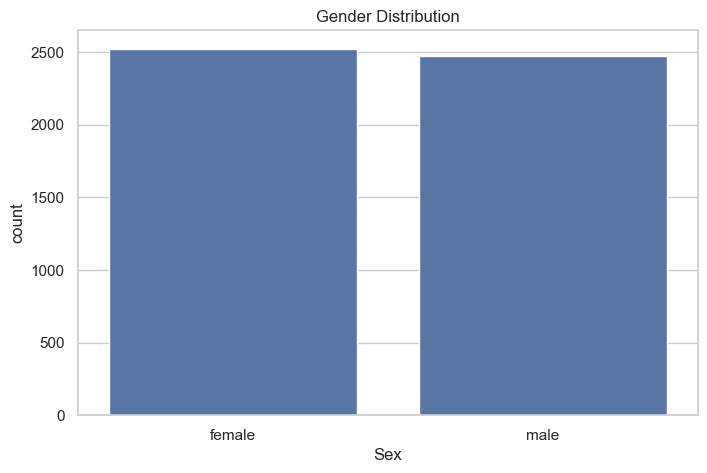

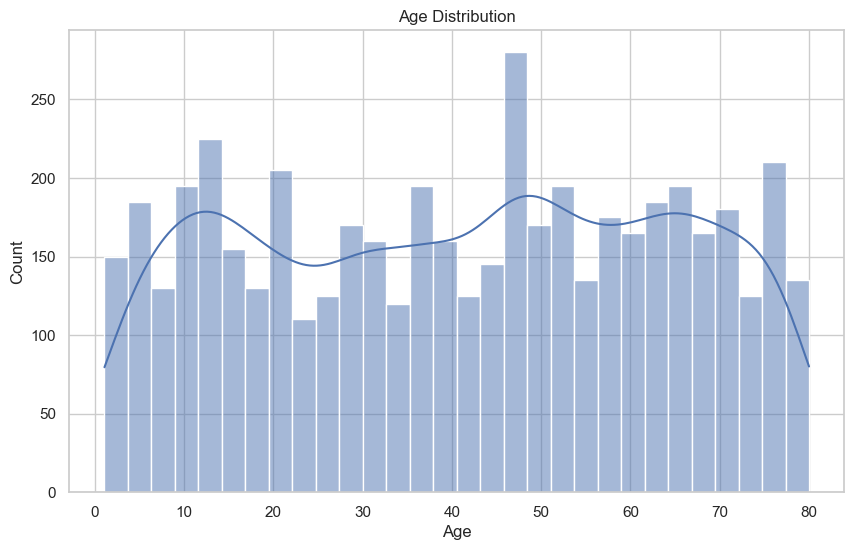

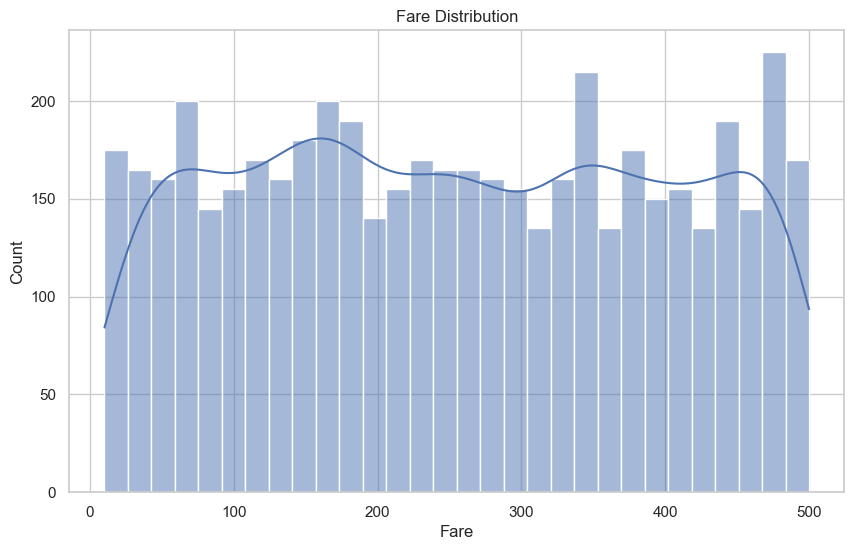

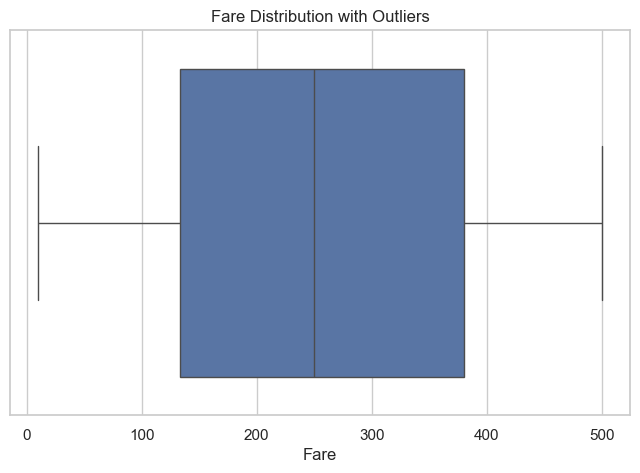

In [7]:
# Survival count
plt.figure(figsize=(8, 5))
sns.countplot(x='Survived', data=clean_df)
plt.title('Survival Count (0 = Died, 1 = Survived)')
plt.show()

# Passenger class distribution
plt.figure(figsize=(8, 5))
sns.countplot(x='Pclass', data=clean_df)
plt.title('Passenger Class Distribution')
plt.show()

# Gender distribution
plt.figure(figsize=(8, 5))
sns.countplot(x='Sex', data=clean_df)
plt.title('Gender Distribution')
plt.show()

# Age distribution
plt.figure(figsize=(10, 6))
sns.histplot(clean_df['Age'], bins=30, kde=True)
plt.title('Age Distribution')
plt.show()

# Fare distribution
plt.figure(figsize=(10, 6))
sns.histplot(clean_df['Fare'], bins=30, kde=True)
plt.title('Fare Distribution')
plt.show()

# Boxplot for Fare to identify outliers
plt.figure(figsize=(8, 5))
sns.boxplot(x=clean_df['Fare'])
plt.title('Fare Distribution with Outliers')
plt.show()

# Bivariate Analysis

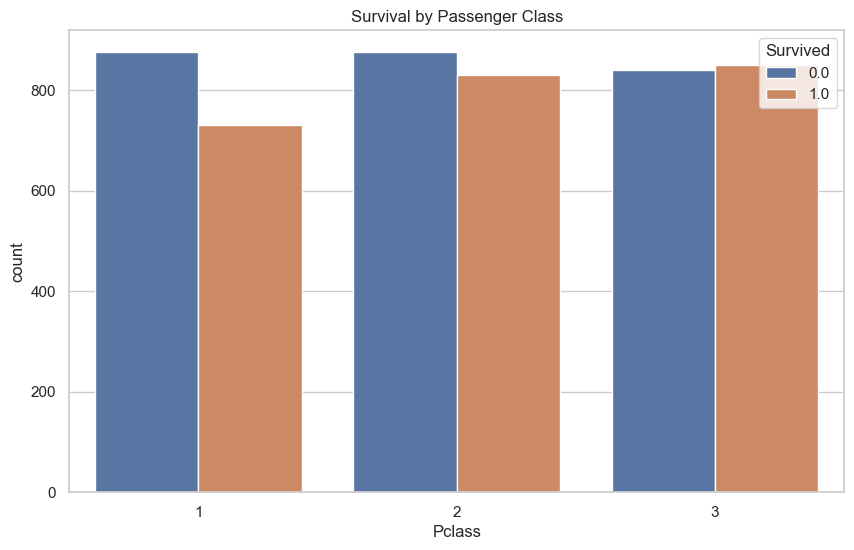

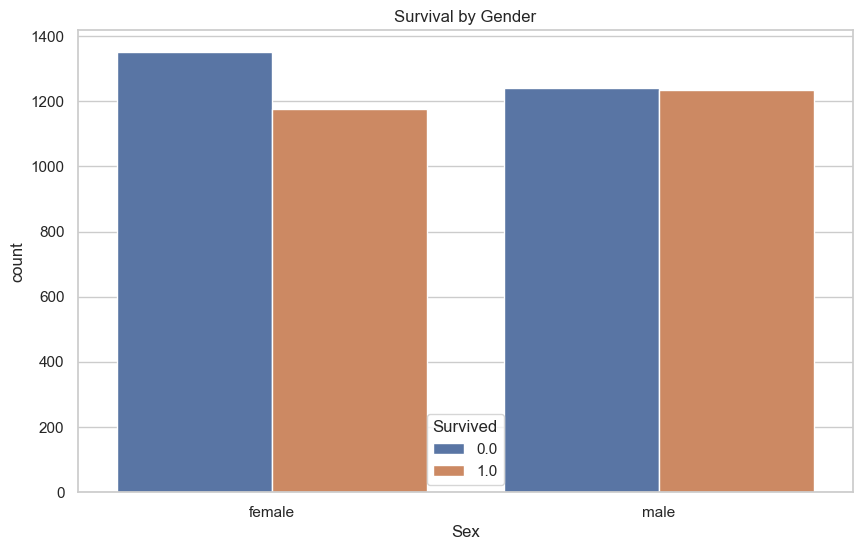

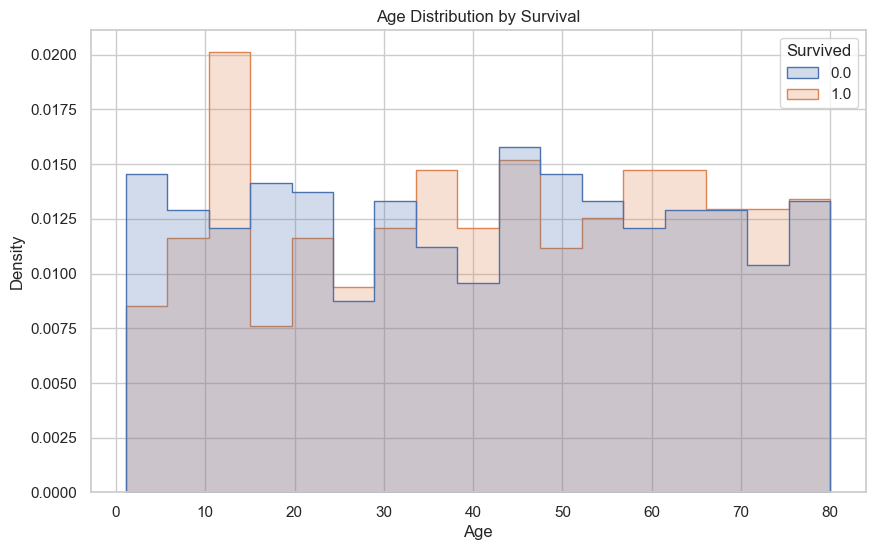

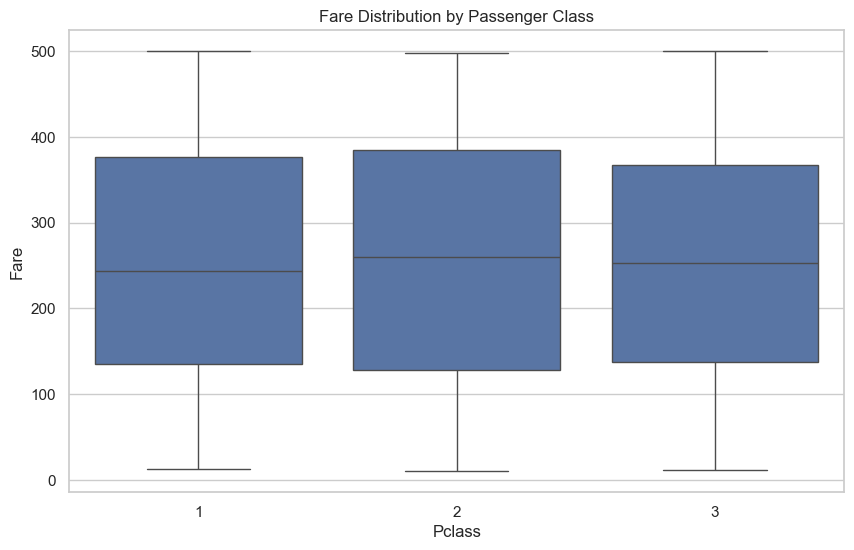

In [8]:
# Survival by passenger class
plt.figure(figsize=(10, 6))
sns.countplot(x='Pclass', hue='Survived', data=clean_df)
plt.title('Survival by Passenger Class')
plt.show()

# Survival by gender
plt.figure(figsize=(10, 6))
sns.countplot(x='Sex', hue='Survived', data=clean_df)
plt.title('Survival by Gender')
plt.show()

# Age distribution by survival
plt.figure(figsize=(10, 6))
sns.histplot(data=clean_df, x='Age', hue='Survived', element='step', stat='density', common_norm=False)
plt.title('Age Distribution by Survival')
plt.show()

# Fare distribution by passenger class
plt.figure(figsize=(10, 6))
sns.boxplot(x='Pclass', y='Fare', data=clean_df)
plt.title('Fare Distribution by Passenger Class')
plt.show()

# Multivariate Analysis

In [ ]:
# Correlation heatmap
plt.figure(figsize=(10, 8))

# Select only numeric columns
numeric_df = clean_df.select_dtypes(include=['number'])

# Compute correlation
corr = numeric_df.corr()

# Plot heatmap
sns.heatmap(corr, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Heatmap')
plt.show()


# Advanced Analysis

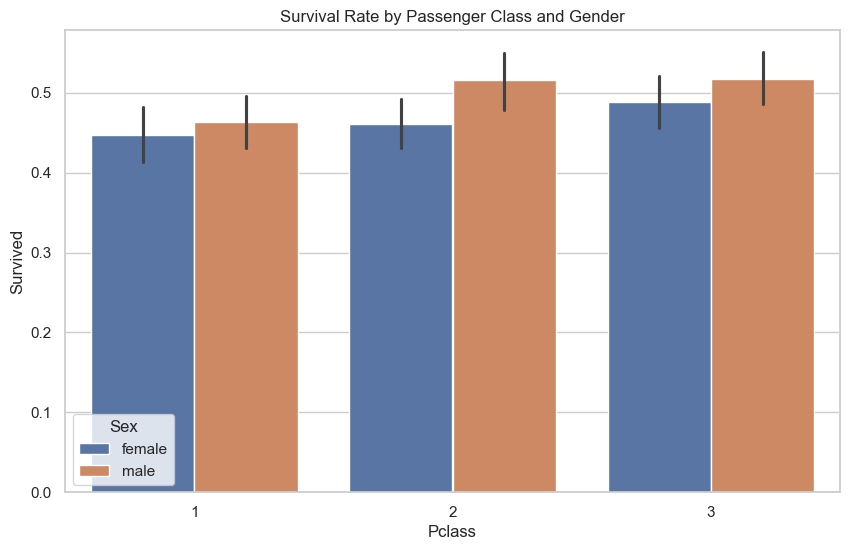

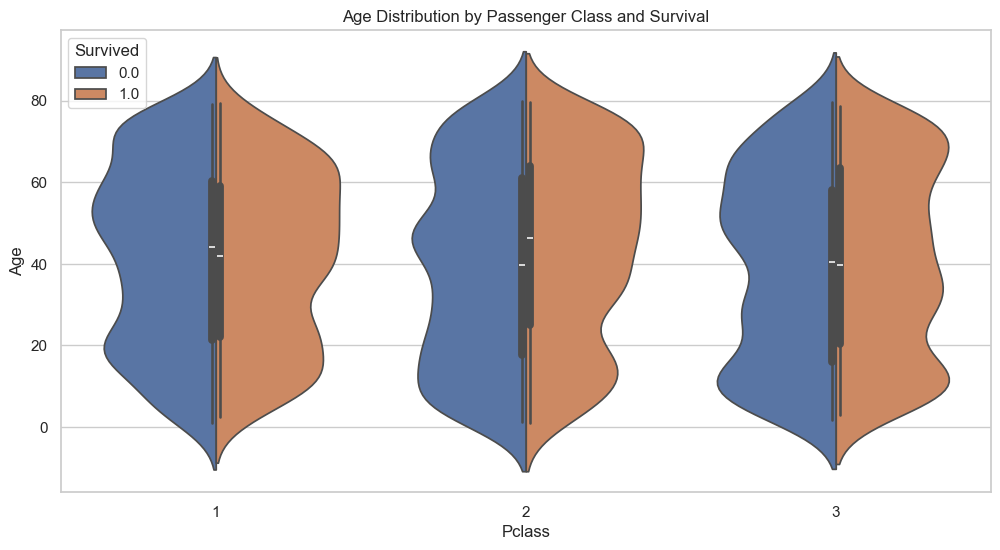

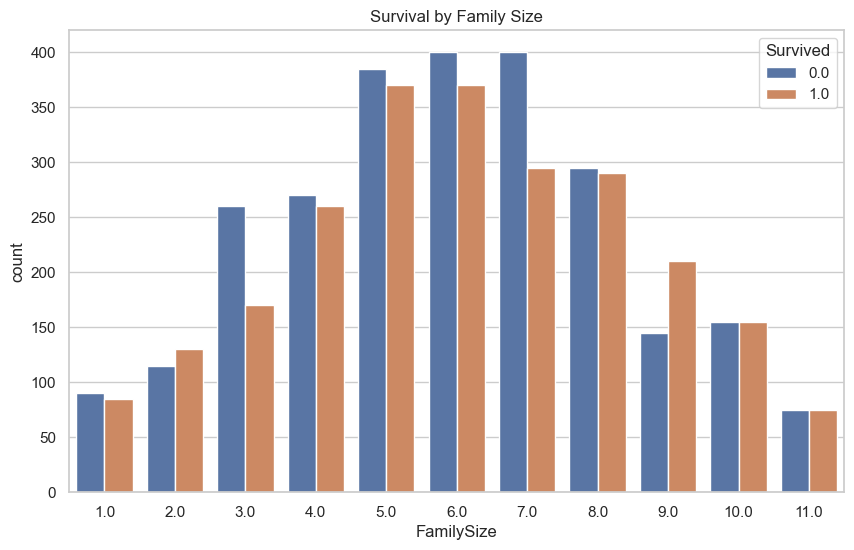

In [10]:
# Survival rate by passenger class and gender
plt.figure(figsize=(10, 6))
sns.barplot(x='Pclass', y='Survived', hue='Sex', data=clean_df)
plt.title('Survival Rate by Passenger Class and Gender')
plt.show()

# Age distribution by passenger class and survival
plt.figure(figsize=(12, 6))
sns.violinplot(x='Pclass', y='Age', hue='Survived', data=clean_df, split=True)
plt.title('Age Distribution by Passenger Class and Survival')
plt.show()

# Family size analysis
clean_df['FamilySize'] = clean_df['SibSp'] + clean_df['Parch'] + 1

plt.figure(figsize=(10, 6))
sns.countplot(x='FamilySize', hue='Survived', data=clean_df)
plt.title('Survival by Family Size')
plt.show()

# Key Findings and Insights

In [11]:
# Calculate key statistics
survival_rate = clean_df['Survived'].mean() * 100
class_survival = clean_df.groupby('Pclass')['Survived'].mean() * 100
gender_survival = clean_df.groupby('Sex')['Survived'].mean() * 100

print(f"Overall Survival Rate: {survival_rate:.2f}%")
print("\nSurvival Rate by Passenger Class:")
print(class_survival)
print("\nSurvival Rate by Gender:")
print(gender_survival)

# Average fare by passenger class and survival
avg_fare = clean_df.groupby(['Pclass', 'Survived'])['Fare'].mean()
print("\nAverage Fare by Class and Survival:")
print(avg_fare)

Overall Survival Rate: 48.20%

Survival Rate by Passenger Class:
Pclass
1    45.482866
2    48.680352
3    50.295858
Name: Survived, dtype: float64

Survival Rate by Gender:
Sex
female    46.534653
male      49.898990
Name: Survived, dtype: float64

Average Fare by Class and Survival:
Pclass  Survived
1       0.0         252.672457
        1.0         254.240205
2       0.0         280.355086
        1.0         232.982048
3       0.0         245.891786
        1.0         261.856706
Name: Fare, dtype: float64


# Data Quality Issues and Potential Improvements

In [12]:
# Check for data quality issues
print("Data Quality Issues:")
print(f"Missing Age values: {clean_df['Age'].isnull().sum()}")
print(f"Missing Fare values: {clean_df['Fare'].isnull().sum()}")

# Suggestions for data cleaning
print("\nSuggestions for Data Cleaning:")
print("- Impute missing Age values with median age by passenger class")
print("- Consider log transformation for Fare due to right skewness")
print("- Create age groups for better analysis")
print("- Create fare categories for better visualization")

Data Quality Issues:
Missing Age values: 1000
Missing Fare values: 1000

Suggestions for Data Cleaning:
- Impute missing Age values with median age by passenger class
- Consider log transformation for Fare due to right skewness
- Create age groups for better analysis
- Create fare categories for better visualization


# Exporting the Cleaned Data and Report

In [ ]:
def create_pdf_report():
    from matplotlib.backends.backend_pdf import PdfPages

    with PdfPages("report.pdf") as pdf:
        # Correlation heatmap
        numeric_df = clean_df.select_dtypes(include=['number'])
        corr = numeric_df.corr()

        fig = plt.figure(figsize=(11, 8))
        sns.heatmap(corr, annot=True, cmap='coolwarm', center=0)
        plt.title('Correlation Heatmap')
        pdf.savefig(fig)
        plt.close()
